In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.duplicated().sum()

34

In [10]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df=df.replace('0',np.nan)

In [13]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [14]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [15]:
df['z']=np.where(df['z']==0,np.nan,df['z'])
df['x']=np.where(df['x']==0,np.nan,df['x'])
df['y']=np.where(df['y']==0,np.nan,df['y'])

In [16]:
df1=df.copy()

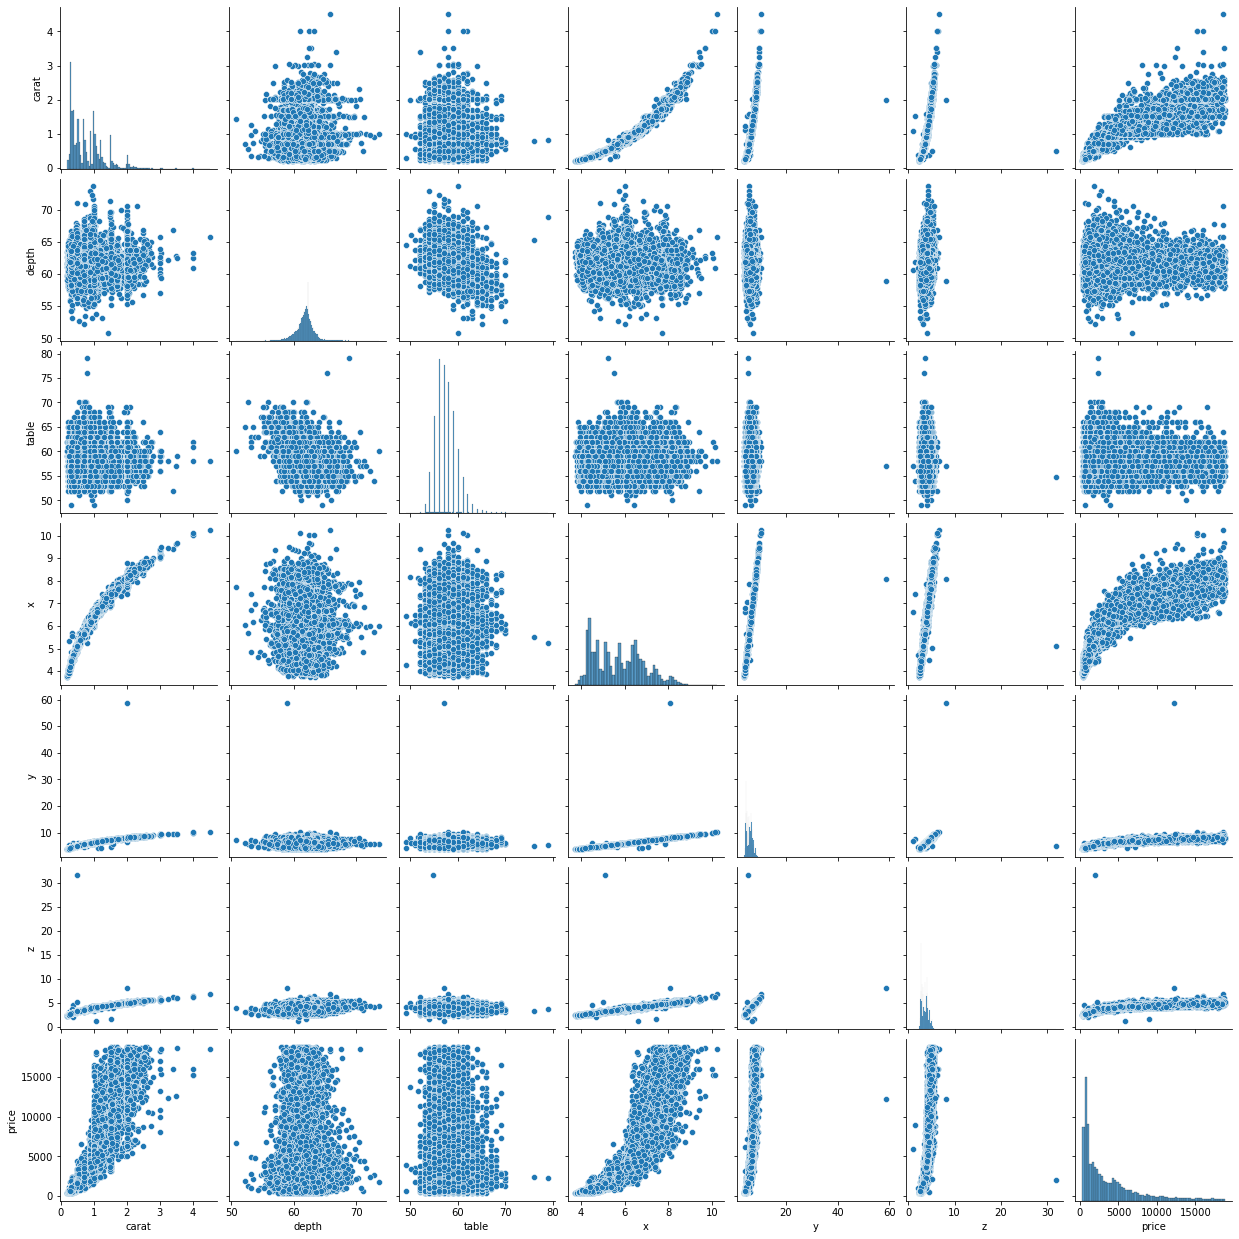

In [17]:
sns.pairplot(df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

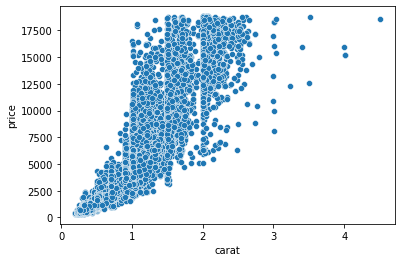

In [18]:
sns.scatterplot(df['carat'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth', ylabel='price'>

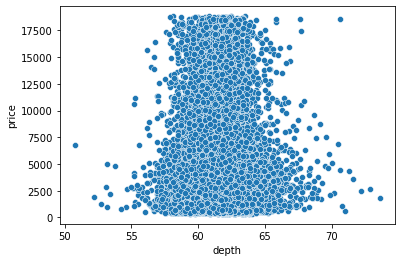

In [19]:
sns.scatterplot(df['depth'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='price'>

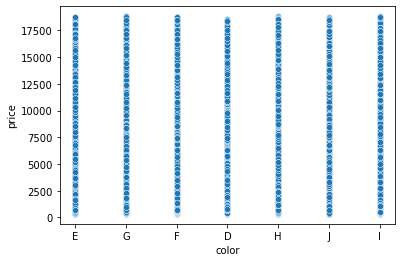

In [20]:
sns.scatterplot(df['color'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='price'>

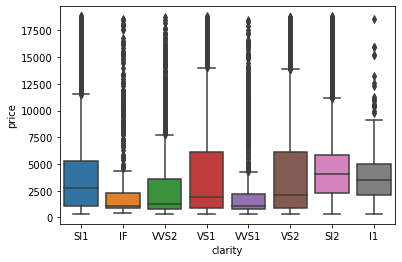

In [21]:
sns.boxplot(df['clarity'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='price'>

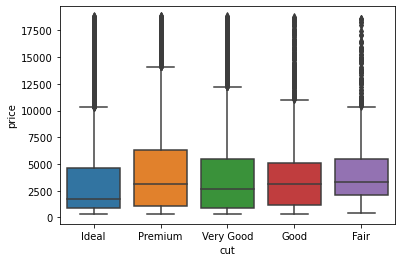

In [22]:
sns.boxplot(df['cut'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='price'>

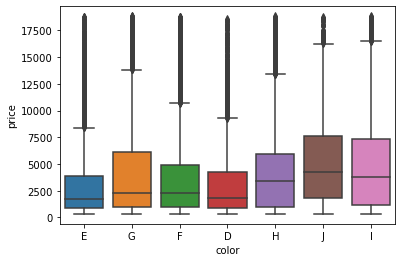

In [23]:
sns.boxplot(df['color'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='price'>

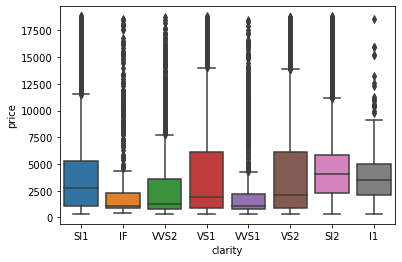

In [24]:
sns.boxplot(df['clarity'],df['price'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

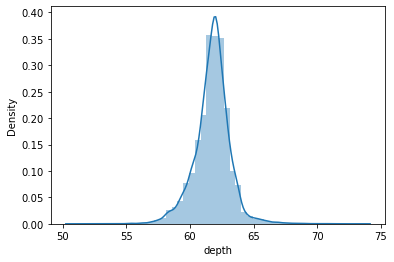

In [25]:
sns.distplot(df['depth'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

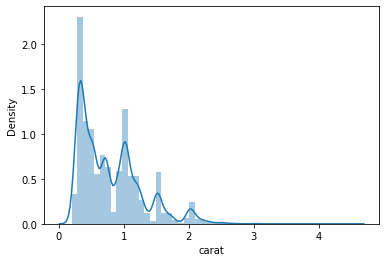

In [26]:
sns.distplot(df['carat'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

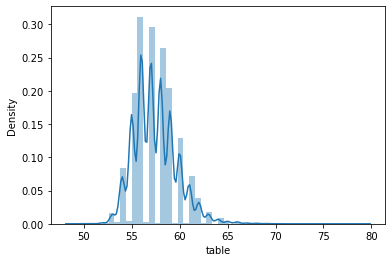

In [27]:
sns.distplot(df['table'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

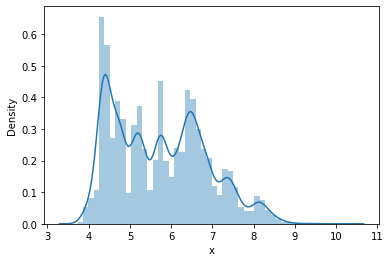

In [28]:
sns.distplot(df['x'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

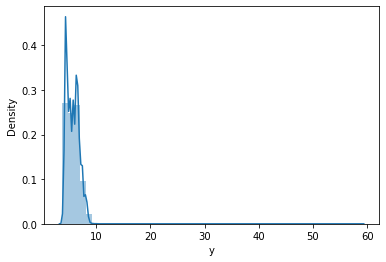

In [29]:
sns.distplot(df['y'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

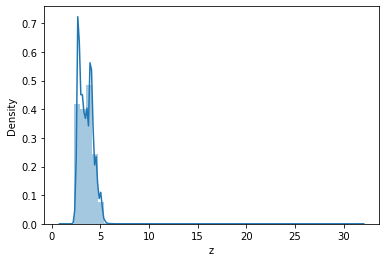

In [30]:
sns.distplot(df['z'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

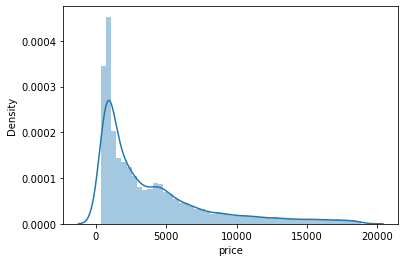

In [31]:
sns.distplot(df['price'])

<AxesSubplot:>

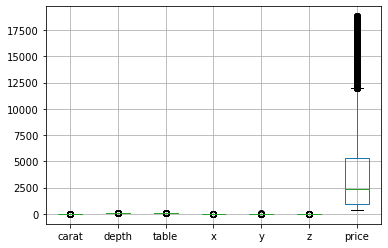

In [32]:
df.boxplot()

<AxesSubplot:>

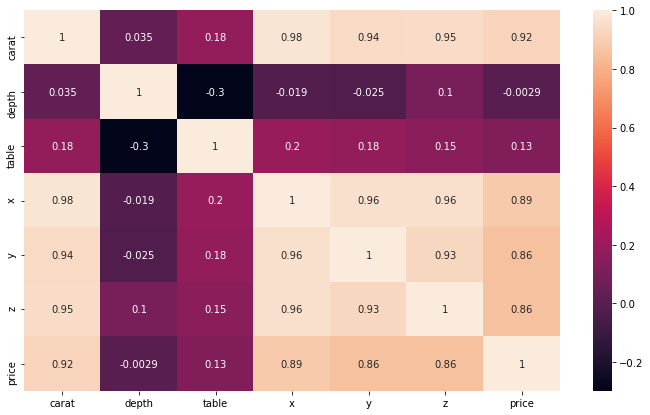

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

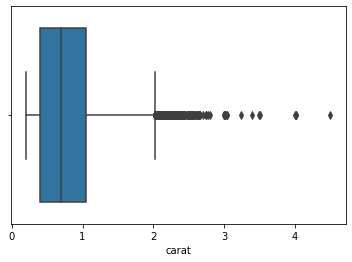

In [34]:
sns.boxplot(df['carat'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth'>

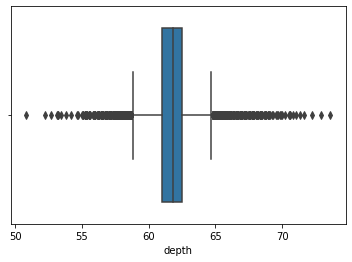

In [35]:
sns.boxplot(df['depth'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

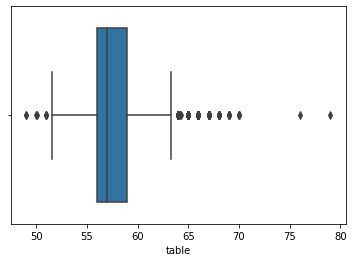

In [36]:
sns.boxplot(df['table'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

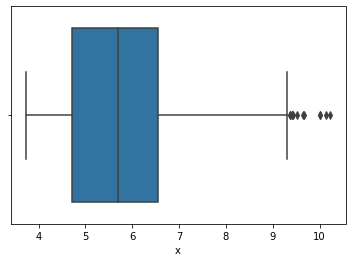

In [37]:
sns.boxplot(df['x'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

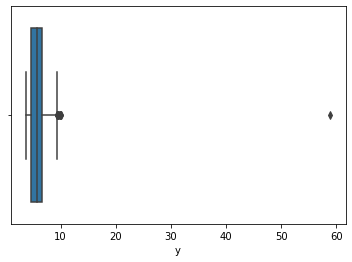

In [38]:
sns.boxplot(df['y'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z'>

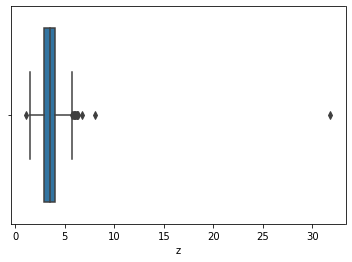

In [39]:
sns.boxplot(df['z'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

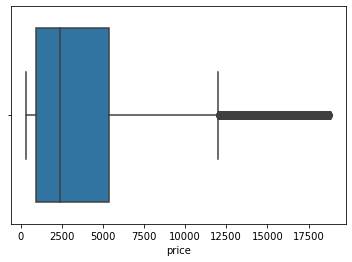

In [40]:
sns.boxplot(df['price'])

In [41]:
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)

In [42]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity_VS1'>

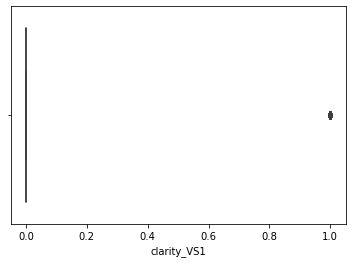

In [43]:
sns.boxplot(df['clarity_VS1'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26933 non-null  float64
 1   depth          26236 non-null  float64
 2   table          26933 non-null  float64
 3   x              26931 non-null  float64
 4   y              26931 non-null  float64
 5   z              26925 non-null  float64
 6   price          26933 non-null  int64  
 7   cut_Good       26933 non-null  uint8  
 8   cut_Ideal      26933 non-null  uint8  
 9   cut_Premium    26933 non-null  uint8  
 10  cut_Very Good  26933 non-null  uint8  
 11  clarity_IF     26933 non-null  uint8  
 12  clarity_SI1    26933 non-null  uint8  
 13  clarity_SI2    26933 non-null  uint8  
 14  clarity_VS1    26933 non-null  uint8  
 15  clarity_VS2    26933 non-null  uint8  
 16  clarity_VVS1   26933 non-null  uint8  
 17  clarity_VVS2   26933 non-null  uint8  
 18  color_

In [45]:
df.isnull().sum()

carat              0
depth            697
table              0
x                  2
y                  2
z                  8
price              0
cut_Good           0
cut_Ideal          0
cut_Premium        0
cut_Very Good      0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
dtype: int64

In [46]:
cont=df.dtypes[(df.dtypes!='uint8')].index
cont


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [47]:
for column in df[cont].columns:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
dtype: int64

In [48]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [49]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

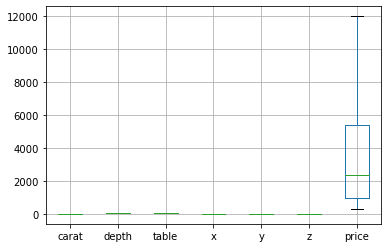

In [50]:
df[cont].boxplot()

MODEL 1

In [51]:
X=df.drop('price',axis=1)
Y=df.pop('price')

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [53]:
regression_model=LinearRegression()

In [54]:
regression_model.fit(X_train,Y_train)

LinearRegression()

In [55]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'],
      dtype='object')

In [56]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9177.816248902349
The coefficient for depth is 10.741529723554498
The coefficient for table is -18.9512608167618
The coefficient for x is -1086.8988868146796
The coefficient for y is 967.9214797584985
The coefficient for z is -577.3369381412507
The coefficient for cut_Good is 460.9612011848339
The coefficient for cut_Ideal is 698.079398013797
The coefficient for cut_Premium is 659.6221327370968
The coefficient for cut_Very Good is 590.4955541784261
The coefficient for clarity_IF is 3992.6454657580784
The coefficient for clarity_SI1 is 2510.226873827374
The coefficient for clarity_SI2 is 1674.8880776432177
The coefficient for clarity_VS1 is 3333.531457039773
The coefficient for clarity_VS2 is 3029.8539250991034
The coefficient for clarity_VVS1 is 3761.3203868893715
The coefficient for clarity_VVS2 is 3746.8059086548797
The coefficient for color_E is -181.22500561464486
The coefficient for color_F is -256.2452462094828
The coefficient for color_G is -428.1865

In [57]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3307.1168880692576


In [58]:
regression_model.score(X_train, Y_train)

0.9402768111499474

In [59]:
regression_model.score(X_test, Y_test)

0.9419848667605929

In [60]:
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

846.9431345379315

In [61]:
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

836.7563997839649

In [62]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)

In [63]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)
data_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [64]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'price'],
      dtype='object')

In [65]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+color_E+color_F+color_G+color_H+color_I+color_J', data = data_train).fit()
lm1.params

Intercept       -3307.116888
carat            9177.816249
depth              10.741530
table             -18.951261
x               -1086.898887
y                 967.921480
z                -577.336938
cut_Good          460.961201
cut_Ideal         698.079398
cut_Premium       659.622133
cut_Very_Good     590.495554
clarity_IF       3992.645466
clarity_SI1      2510.226874
clarity_SI2      1674.888078
clarity_VS1      3333.531457
clarity_VS2      3029.853925
clarity_VVS1     3761.320387
clarity_VVS2     3746.805909
color_E          -181.225006
color_F          -256.245246
color_G          -428.186542
color_H          -856.368644
color_I         -1325.352120
color_J         -1929.057227
dtype: float64

In [66]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.289e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:44:04   Log-Likelihood:            -1.5385e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.079e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3307.1169    748.747     -4.417

In [67]:
np.sqrt(lm1.mse_resid)


847.4827320237546

In [68]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')
    

(-3307.12) * Intercept + (9177.82) * carat + (10.74) * depth + (-18.95) * table + (-1086.9) * x + (967.92) * y + (-577.34) * z + (460.96) * cut_Good + (698.08) * cut_Ideal + (659.62) * cut_Premium + (590.5) * cut_Very_Good + (3992.65) * clarity_IF + (2510.23) * clarity_SI1 + (1674.89) * clarity_SI2 + (3333.53) * clarity_VS1 + (3029.85) * clarity_VS2 + (3761.32) * clarity_VVS1 + (3746.81) * clarity_VVS2 + (-181.23) * color_E + (-256.25) * color_F + (-428.19) * color_G + (-856.37) * color_H + (-1325.35) * color_I + (-1929.06) * color_J + 

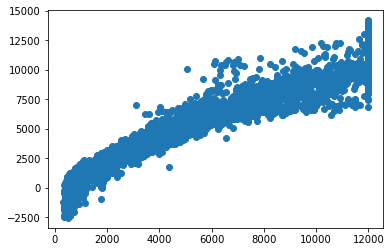

In [69]:
y_pred = lm1.predict(data_test)
plt.scatter(Y_test, y_pred)
plt.show()

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [72]:
i=0
for column in X.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.83209929169017
depth ---> 1348.5747037839517
table ---> 978.7910961905317
x ---> 11960.44592119137
y ---> 11486.794645087222
z ---> 3179.596094744831
cut_Good ---> 4.4914016280632785
cut_Ideal ---> 18.016728432469563
cut_Premium ---> 10.83115735472792
cut_Very Good ---> 10.01637987063325
clarity_IF ---> 3.655387429980751
clarity_SI1 ---> 19.688570072296287
clarity_SI2 ---> 13.82199801875791
clarity_VS1 ---> 12.746420794843807
clarity_VS2 ---> 18.44735046547165
clarity_VVS1 ---> 6.431913987513056
clarity_VVS2 ---> 8.379930444886524
color_E ---> 2.480829824573142
color_F ---> 2.448039716583097
color_G ---> 2.796050687532723
color_H ---> 2.305043749504993
color_I ---> 1.9312909945309655
color_J ---> 1.5142333068255323


Model 2

In [73]:
X1=X.drop('depth',axis=1)
Y1=Y.copy()

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.30,random_state=1)

In [75]:
regression_model=LinearRegression()

In [76]:
regression_model.fit(X_train,Y_train)

LinearRegression()

In [77]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9186.001691742242
The coefficient for table is -19.772607092236044
The coefficient for x is -1112.1452357587395
The coefficient for y is 923.6573503607982
The coefficient for z is -470.01932966103345
The coefficient for cut_Good is 463.48767099091594
The coefficient for cut_Ideal is 694.1160892305046
The coefficient for cut_Premium is 655.7941825676272
The coefficient for cut_Very Good is 588.7692880496952
The coefficient for clarity_IF is 3992.6305534132152
The coefficient for clarity_SI1 is 2511.9543228409543
The coefficient for clarity_SI2 is 1676.2228142652978
The coefficient for clarity_VS1 is 3334.3531134479144
The coefficient for clarity_VS2 is 3031.191329224621
The coefficient for clarity_VVS1 is 3761.884674946648
The coefficient for clarity_VVS2 is 3747.7676614695797
The coefficient for color_E is -181.40348167212798
The coefficient for color_F is -256.2484911570271
The coefficient for color_G is -427.96564110305627
The coefficient for color_H is -

In [78]:
regression_model.score(X_train, Y_train)

0.9402734235993757

In [79]:
regression_model.score(X_test, Y_test)

0.9419772977705174

In [80]:
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

846.9671538683799

In [81]:
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

836.8109820452848

In [82]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)

In [83]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)
data_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [84]:
lm2 = smf.ols(formula= 'price ~ carat+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+color_E+color_F+color_G+color_H+color_I+color_J', data = data_train).fit()
lm2.params

Intercept       -2583.118355
carat            9186.001692
table             -19.772607
x               -1112.145236
y                 923.657350
z                -470.019330
cut_Good          463.487671
cut_Ideal         694.116089
cut_Premium       655.794183
cut_Very_Good     588.769288
clarity_IF       3992.630553
clarity_SI1      2511.954323
clarity_SI2      1676.222814
clarity_VS1      3334.353113
clarity_VS2      3031.191329
clarity_VVS1     3761.884675
clarity_VVS2     3747.767661
color_E          -181.403482
color_F          -256.248491
color_G          -427.965641
color_H          -855.872121
color_I         -1324.676275
color_J         -1928.625884
dtype: float64

In [85]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.347e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:44:08   Log-Likelihood:            -1.5385e+05
No. Observations:               18853   AIC:                         3.077e+05
Df Residuals:                   18830   BIC:                         3.079e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2583.1184    264.237     -9.776

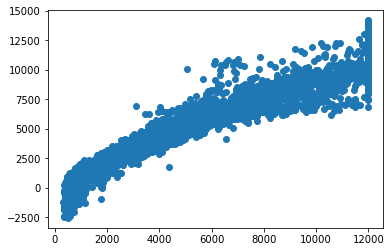

In [86]:
y_pred1 = lm2.predict(data_test)
plt.scatter(Y_test, y_pred1)
plt.show()

In [87]:
vif = [variance_inflation_factor(X1.values, ix) for ix in range(X1.shape[1])]

In [88]:
i=0
for column in X1.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 102.22998573256453
table ---> 343.67178696032374
x ---> 11907.66520065791
y ---> 11068.192853143442
z ---> 1592.6925974471997
cut_Good ---> 4.364430991175007
cut_Ideal ---> 16.032354095929502
cut_Premium ---> 10.552785297072413
cut_Very Good ---> 9.581139499530757
clarity_IF ---> 3.507794731999077
clarity_SI1 ---> 18.901145707067478
clarity_SI2 ---> 13.307124818568566
clarity_VS1 ---> 12.220903273804456
clarity_VS2 ---> 17.66874831948798
clarity_VVS1 ---> 6.149324444822197
clarity_VVS2 ---> 8.015137230464944
color_E ---> 2.478314015891665
color_F ---> 2.4444749919155604
color_G ---> 2.7914199796781376
color_H ---> 2.296962880031655
color_I ---> 1.92588279414264
color_J ---> 1.5119985802546922


Model 3

In [89]:
X2=X1.drop(['x','y','z'],axis=1)
Y2=Y1.copy()

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X2,Y2,test_size=0.30,random_state=1)

In [91]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [92]:
regression_model.score(X_train, Y_train)

0.9393171362343992

In [93]:
regression_model.score(X_test, Y_test)

0.9409496290835132

In [94]:
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

853.7206605394963

In [95]:
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

844.1890422617596

In [96]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)

In [97]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)
data_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [98]:
lm3 = smf.ols(formula= 'price ~ carat+table+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+color_E+color_F+color_G+color_H+color_I+color_J', data = data_train).fit()
lm3.params

Intercept       -4717.669365
carat            8039.203872
table             -16.920608
cut_Good          551.984617
cut_Ideal         788.469740
cut_Premium       717.107342
cut_Very_Good     700.355344
clarity_IF       4103.304058
clarity_SI1      2549.298563
clarity_SI2      1711.292565
clarity_VS1      3391.387215
clarity_VS2      3086.355646
clarity_VVS1     3864.062908
clarity_VVS2     3829.749402
color_E          -183.419885
color_F          -266.758687
color_G          -438.343710
color_H          -855.508274
color_I         -1312.907454
color_J         -1913.271318
dtype: float64

In [99]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.534e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:44:11   Log-Likelihood:            -1.5400e+05
No. Observations:               18853   AIC:                         3.080e+05
Df Residuals:                   18833   BIC:                         3.082e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4717.6694    217.998    -21.641

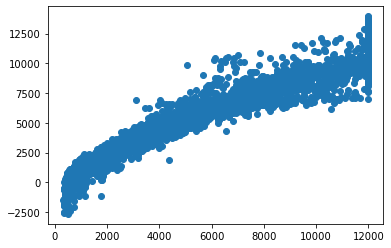

In [100]:
y_pred2 = lm3.predict(data_test)
plt.scatter(Y_test, y_pred2)
plt.show()

In [101]:
vif = [variance_inflation_factor(X2.values, ix) for ix in range(X2.shape[1])]

In [102]:
i=0
for column in X2.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.223684588164773
table ---> 97.56394186616357
cut_Good ---> 4.1312866621866124
cut_Ideal ---> 14.335956924499904
cut_Premium ---> 9.885733103057277
cut_Very Good ---> 8.70333130825681
clarity_IF ---> 3.481310724007501
clarity_SI1 ---> 18.559797736467978
clarity_SI2 ---> 13.097823682775097
clarity_VS1 ---> 12.053613938763373
clarity_VS2 ---> 17.42144406697902
clarity_VVS1 ---> 6.101273452791654
clarity_VVS2 ---> 7.9337889552988
color_E ---> 2.4758946280948533
color_F ---> 2.4352303532503305
color_G ---> 2.7781168170164494
color_H ---> 2.290612795680401
color_I ---> 1.9225371559098865
color_J ---> 1.509672238133545


Model 4

In [103]:
X3=X2.drop(['table'],axis=1)
Y3=Y2.copy()

In [104]:
X3.head()

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.33,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.90,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0.42,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.31,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(X3,Y3,test_size=0.30,random_state=1)

In [106]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [107]:
regression_model.score(X_train, Y_train)

0.9392439528661671

In [108]:
regression_model.score(X_test, Y_test)

0.9408594186378849

In [109]:
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

854.2352978178085

In [110]:
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

844.8336242144079

In [111]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)

In [112]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)
data_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [113]:
lm4 = smf.ols(formula= 'price ~ carat+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2+color_E+color_F+color_G+color_H+color_I+color_J', data = data_train).fit()
lm4.params

Intercept       -5707.244429
carat            8032.113528
cut_Good          552.858108
cut_Ideal         833.816430
cut_Premium       717.475201
cut_Very_Good     713.130118
clarity_IF       4107.914078
clarity_SI1      2551.695483
clarity_SI2      1712.361498
clarity_VS1      3394.032272
clarity_VS2      3088.770368
clarity_VVS1     3865.542536
clarity_VVS2     3830.949518
color_E          -185.264716
color_F          -266.498392
color_G          -437.343663
color_H          -853.846017
color_I         -1312.343749
color_J         -1913.840264
dtype: float64

In [114]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.618e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:44:14   Log-Likelihood:            -1.5401e+05
No. Observations:               18853   AIC:                         3.081e+05
Df Residuals:                   18834   BIC:                         3.082e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5707.2444     66.430    -85.914

In [115]:
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-5707.24) * Intercept + (8032.11) * carat + (552.86) * cut_Good + (833.82) * cut_Ideal + (717.48) * cut_Premium + (713.13) * cut_Very_Good + (4107.91) * clarity_IF + (2551.7) * clarity_SI1 + (1712.36) * clarity_SI2 + (3394.03) * clarity_VS1 + (3088.77) * clarity_VS2 + (3865.54) * clarity_VVS1 + (3830.95) * clarity_VVS2 + (-185.26) * color_E + (-266.5) * color_F + (-437.34) * color_G + (-853.85) * color_H + (-1312.34) * color_I + (-1913.84) * color_J + 

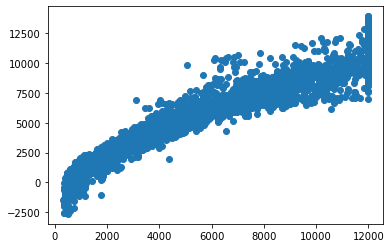

In [116]:
y_pred3 = lm4.predict(data_test)
plt.scatter(Y_test, y_pred3)
plt.show()

In [117]:
vif = [variance_inflation_factor(X3.values, ix) for ix in range(X3.shape[1])]

In [118]:
i=0
for column in X3.columns:
    if i < 23:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.823963552948521
cut_Good ---> 3.5020910476346123
cut_Ideal ---> 12.444657871405733
cut_Premium ---> 8.172657501145094
cut_Very Good ---> 7.362893118877587
clarity_IF ---> 2.111573704227221
clarity_SI1 ---> 8.582797349957549
clarity_SI2 ---> 6.341835689528017
clarity_VS1 ---> 5.81765676176599
clarity_VS2 ---> 8.132009944538451
clarity_VVS1 ---> 3.2360618789461135
clarity_VVS2 ---> 3.994479451757277
color_E ---> 2.3711536081820666
color_F ---> 2.340035283675498
color_G ---> 2.6842016288544035
color_H ---> 2.221751381261127
color_I ---> 1.8871709780128412
color_J ---> 1.4941185157588375


In [119]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [120]:
df1['color']=np.where(df1['color']=='D','Colorless',df1['color'])
df1['color']=np.where(df1['color']=='E','Colorless',df1['color'])
df1['color']=np.where(df1['color']=='F','Colorless',df1['color'])
df1['color']=np.where(df1['color']=='G','Near_Colorless',df1['color'])
df1['color']=np.where(df1['color']=='H','Near_Colorless',df1['color'])
df1['color']=np.where(df1['color']=='I','Near_Colorless',df1['color'])
df1['color']=np.where(df1['color']=='J','Near_Colorless',df1['color'])

df1['clarity']=np.where(df1['clarity']=='I1','Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='SI1','Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='SI2','Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VS1','Slightly_Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VS2','Slightly_Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VVS1','Very_Slightly_Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VVS2','Very_Slightly_Impure',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='IF','No_Impurities',df1['clarity'])

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26931 non-null  float64
 7   y        26931 non-null  float64
 8   z        26925 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [122]:
df1 = pd.get_dummies(df1, columns=['cut','clarity','color'],drop_first=True)
df1.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_No_Impurities,clarity_Slightly_Impure,clarity_Very_Slightly_Impure,color_Near_Colorless
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,1,0,0,1
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,1,0,0,1,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,0,1,0


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   carat                         26933 non-null  float64
 1   depth                         26236 non-null  float64
 2   table                         26933 non-null  float64
 3   x                             26931 non-null  float64
 4   y                             26931 non-null  float64
 5   z                             26925 non-null  float64
 6   price                         26933 non-null  int64  
 7   cut_Good                      26933 non-null  uint8  
 8   cut_Ideal                     26933 non-null  uint8  
 9   cut_Premium                   26933 non-null  uint8  
 10  cut_Very Good                 26933 non-null  uint8  
 11  clarity_No_Impurities         26933 non-null  uint8  
 12  clarity_Slightly_Impure       26933 non-null  uint8  
 13  c

In [124]:
cont1=df1.dtypes[(df1.dtypes!='uint8')].index
cont1

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [125]:
for column in df1[cont1].columns:
    mean = df1[column].mean()
    df1[column] = df1[column].fillna(mean)    
        
df1.isnull().sum()

carat                           0
depth                           0
table                           0
x                               0
y                               0
z                               0
price                           0
cut_Good                        0
cut_Ideal                       0
cut_Premium                     0
cut_Very Good                   0
clarity_No_Impurities           0
clarity_Slightly_Impure         0
clarity_Very_Slightly_Impure    0
color_Near_Colorless            0
dtype: int64

In [126]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [127]:
for column in df1[cont1].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

In [128]:
df1.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_No_Impurities,clarity_Slightly_Impure,clarity_Very_Slightly_Impure,color_Near_Colorless
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,0,1,0,0,1
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,1,0,0,1,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,0,0,1,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,0,0,0,1,0


<AxesSubplot:>

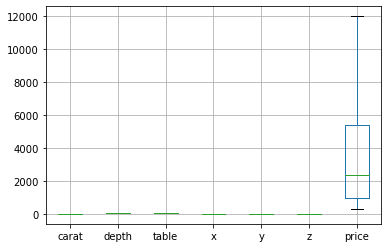

In [129]:
df1[cont1].boxplot()

Model 5

In [130]:
X=df1.drop('price',axis=1)
Y=df1.pop('price')

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [154]:
regression_model=LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [155]:
regression_model.score(X_train, Y_train)

0.9200764763277954

In [156]:
regression_model.score(X_test, Y_test)

0.9204532256588815

In [157]:
predicted_train=regression_model.fit(X_train, Y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))

979.7608219217366

In [158]:
predicted_test=regression_model.fit(X_train, Y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

979.805070078681

In [159]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_test=pd.concat([X_test,Y_test],axis=1)

In [160]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)
data_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [161]:
lm1 = smf.ols(formula= 'price ~ carat+depth+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+clarity_No_Impurities+clarity_Slightly_Impure+clarity_Very_Slightly_Impure+color_Near_Colorless', data = data_train).fit()
lm1.params

Intercept                      -4250.301787
carat                           8650.913669
depth                             32.651852
x                              -1221.551832
y                               1277.609446
z                               -706.411151
cut_Good                         710.573327
cut_Ideal                       1042.857463
cut_Premium                      958.823188
cut_Very_Good                    884.697756
clarity_No_Impurities           1882.653156
clarity_Slightly_Impure         1005.652859
clarity_Very_Slightly_Impure    1616.660225
color_Near_Colorless            -660.420134
dtype: float64

In [162]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.665e+04
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:26:31   Log-Likelihood:            -1.5661e+05
No. Observations:               18853   AIC:                         3.133e+05
Df Residuals:                   18839   BIC:                         3.134e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       